In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import median

In [2]:
steps_df = pd.read_csv('../data/step_count_updated.csv')

# Convert to datetime
steps_df['startDate'] = pd.to_datetime(steps_df['startDate'], format='%Y-%m-%d %H:%M:%S +0000')

# Split 'startDate' into 'Date' and 'Time'
steps_df.insert(loc=1, column='Date', value=pd.to_datetime(steps_df['startDate']).dt.date)
steps_df.insert(loc=2, column='Time', value=pd.to_datetime(steps_df['startDate']).dt.time)
steps_df.drop(columns=["startDate", "endDate", "unit"], inplace=True)
steps_df.columns = ['Date', 'Time', 'Steps']

# Group by date
daily_steps_df = steps_df.groupby('Date').sum()
daily_steps_df.reset_index(inplace=True)

daily_steps_df

,Date,Steps
0,2019-12-24,1155
1,2019-12-25,1267
2,2019-12-26,241
3,2019-12-27,5310
4,2019-12-28,2580
...,...,...
859,2022-05-02,5935
860,2022-05-03,5054
861,2022-05-04,6713
862,2022-05-05,2145


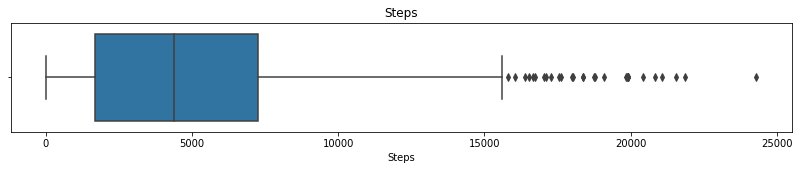

Text(0.5, 1.0, 'Steps')

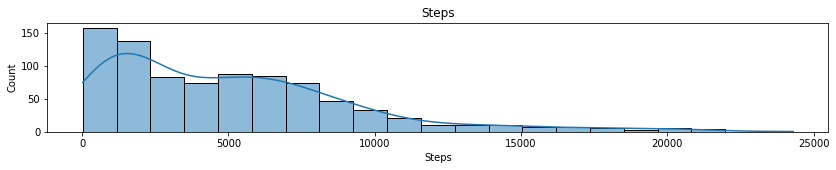

In [3]:
col = daily_steps_df['Steps'].dropna()
fig, ax = plt.subplots(figsize=(14, 2))
sns.boxplot(x=col)
ax.set_title('Steps')

plt.show()

fig2, ax2 = plt.subplots(figsize=(14, 2))
sns.histplot(data=col,kde=True)

ax2.set_title('Steps')

In [4]:
# Not sure what to do with values below 1000
daily_steps_df[daily_steps_df['Steps']<=400]

,Date,Steps
2,2019-12-26,241
67,2020-02-29,90
69,2020-03-02,106
70,2020-03-03,113
71,2020-03-04,225
72,2020-03-05,219
86,2020-03-19,384
88,2020-03-21,310
89,2020-03-22,374
90,2020-03-23,357


In [6]:
daily_steps_df.to_excel('../data/cleaned_daily_step_data.xlsx')